In [6]:
# load libraries

from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.metrics import confusion_matrix, accuracy_score
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import pickle

In [2]:
# load function

def cluster_scoring(model, y_true):
    
    '''function to compute the accuracy, sensitivity and specificity of a clustering algorithm
    when the true class labels are known'''
    
    tn, fp, fn, tp = confusion_matrix(y_true, model.labels_).ravel()
    accuracy = accuracy_score(y_true, model.labels_)
    sensitivity = tp/(tp+fn)
    specificity = tn/(tn+fp)

    return accuracy, sensitivity, specificity


In [3]:
# load function

def cluster_values(df_col, cluster_results_col):
    
    '''Function to that resturns the corresponding values from the dataframe for each cluster result,
    e.g. all MMSE scores associated with cluser 1 for an algorithm'''
   
    cluster0_values = []
    cluster1_values = []
    
    for value, label in zip(df_col, cluster_results_col):
        if label == 0:
            cluster0_values.append(value)
        
        elif label == 1:
             cluster1_values.append(value)       
            
    return cluster0_values, cluster1_values

In [33]:
# set path

ADNI_dir = '/Users/natashaclarke/Documents/brainhack/ADNI_matched'

In [22]:
# load pickled models

model1_Ward = pickle.load(open('model1_ward.sav', 'rb'))
model2_Average = pickle.load(open('model2_average.sav', 'rb'))
model3_KMeans = pickle.load(open('model3_kmeans.sav', 'rb'))

In [30]:
# load a spreadsheet that lists the info you have for your data (file name, demographics etc)

df = pd.read_excel(open('matched_ADNI_AD.xlsx', 'rb'))

In [31]:
# sort by the file name so that the df is in the same order as when we sorted the files before calculating connectivity

df = df.sort_values('File')

In [32]:
df

,record_id,weight,Age,File,Confound file,MMSE Total Score,Sex,Subject ID,research_group,scores,match_id
0,30,1.0,73.4,fmri_sub002S4262_sess20120419_taskrest_n.nii.gz,fmri_sub002S4262_sess20120419_taskrest_n_confo...,29,F,002_S_4262,CN,0.442962,10
1,32,1.0,80.0,fmri_sub006S0498_sess20151123_taskrest_n.nii.gz,fmri_sub006S0498_sess20151123_taskrest_n_confo...,30,M,006_S_0498,CN,0.571745,6
2,6,1.0,80.0,fmri_sub006S4153_sess20120327_taskrest_n.nii.gz,fmri_sub006S4153_sess20120327_taskrest_n_confo...,23,M,006_S_4153,AD,0.571745,6
3,7,1.0,83.0,fmri_sub006S4192_sess20120507_taskrest_n.nii.gz,fmri_sub006S4192_sess20120507_taskrest_n_confo...,22,M,006_S_4192,AD,0.571840,7
4,8,1.0,75.1,fmri_sub006S4867_sess20130304_taskrest_n.nii.gz,fmri_sub006S4867_sess20130304_taskrest_n_confo...,23,M,006_S_4867,AD,0.570331,8
5,35,0.5,76.8,fmri_sub007S4488_sess20160222_taskrest_n.nii.gz,fmri_sub007S4488_sess20160222_taskrest_n_confo...,30,M,007_S_4488,CN,0.570998,9
6,36,1.0,75.4,fmri_sub007S4516_sess20160215_taskrest_n.nii.gz,fmri_sub007S4516_sess20160215_taskrest_n_confo...,30,M,007_S_4516,CN,0.570462,8
7,39,0.5,67.6,fmri_sub012S4545_sess20120924_taskrest_n.nii.gz,fmri_sub012S4545_sess20120924_taskrest_n_confo...,29,F,012_S_4545,CN,0.441724,4
8,9,1.0,76.6,fmri_sub013S5071_sess20130827_taskrest_n.nii.gz,fmri_sub013S5071_sess20130827_taskrest_n_confo...,21,M,013_S_5071,AD,0.570929,9
9,20,1.0,77.8,fmri_sub018S4313_sess20120801_taskrest_n.nii.gz,fmri_sub018S4313_sess20120801_taskrest_n_confo...,27,F,018_S_4313,CN,0.444852,5


In [34]:
# load the correlations between seed region and ROIs

corrs = pd.read_excel(open('correlations.xlsx', 'rb'))

In [35]:
# concatenate the correlations with the df

df = pd.concat([df, corrs], axis=1)

In [31]:
#df = df.drop(['File'], axis=1)

In [36]:
# add cluster results to the df

df['ward_agglo'] = model1_Ward.labels_
df['average_agglo'] = model2_Average.labels_
df['KMeans'] = model3_KMeans.labels_

In [37]:
# turn the column in your df containing the group true labels into a list

true_labels = df['research_group'].tolist()

In [38]:
# if your labels are e.g. CN and AD, convert to 0 or 1

true_labels = [0 if x=='CN' else 1 for x in true_labels]  

In [39]:
# load the array of time series correlations that we used to train clustering models

X = np.load('clustering_X.npy')

In [40]:
# compute the accuracy, sensitivity and specifity for each clustering algorithm

cluster_scoring(model1_Ward, true_labels)

(0.6, 0.3, 0.9)

In [41]:
cluster_scoring(model2_Average, true_labels)

(0.55, 0.2, 0.9)

In [42]:
cluster_scoring(model3_KMeans, true_labels)

(0.55, 0.5, 0.6)

In [100]:
# if you want to do something with the scores you can access them by doing the below

ward_acc = cluster_scoring(model1_Ward, true_labels)[0]  # change to 1 for sensitivity, 2 for specificty

In [80]:
# compute the Silhouette coefficient/ score for samples in each cluster, along with the mean and sd. 
# It is a measure of goodness of the clustering technique, and ranges from -1 to 1
# add the silhouette scores to a df for visualization. This code could do with tidying up and I am on the case!

sil_ward = silhouette_samples(X, model1_Ward.labels_)
sil_ward_mean = np.mean(sil_ward)
sil_ward_sd = np.std(sil_ward) 

df1 = pd.DataFrame(data=0, columns=['silhouette', 'group', 'model'], index=range(0))
df1['silhouette'] = sil_ward
df1['group'] = df['research_group']
df1['model']= 'Ward'

In [53]:
sil_average = silhouette_samples(X, model2_Average.labels_)
sil_av_mean = np.mean(sil_average)
sil_av_sd = np.std(sil_average) 

df2 = pd.DataFrame(data=0, columns=['silhouette', 'group', 'model'], index=range(0))
df2['silhouette'] = sil_average
df2['group'] = df['research_group']
df2['model']= 'Average'

In [50]:
sil_KMeans = silhouette_samples(X, model3_KMeans.labels_)
sil_K_mean = np.mean(sil_KMeans)
sil_K_sd = np.std(sil_KMeans) 

df3 = pd.DataFrame(data=0, columns=['silhouette', 'group', 'model'], index=range(0))
df3['silhouette'] = sil_KMeans
df3['group'] = df['research_group']
df3['model']= 'KMeans'

In [54]:
# concatenate dfs

sil_df = pd.concat([df1, df2, df3]).reset_index(drop=True)

In [57]:
# set the seaborn theme

sns.set_theme(style='ticks', palette='colorblind')

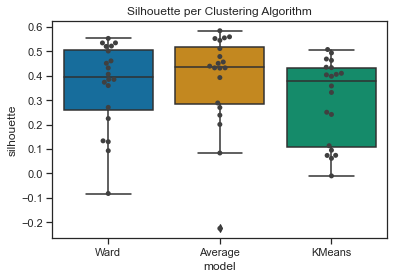

In [75]:
# create box plots comparing the silhouette scores for each clustering algorithm

sns.boxplot(x="model", y="silhouette", data=sil_df).set_title('Silhouette per Clustering Algorithm')
sns.swarmplot(x="model", y="silhouette", data=sil_df, color=".25")

plt.savefig("silhouette_box_plots.png", bbox_inches="tight", dpi=300)  # save the plot

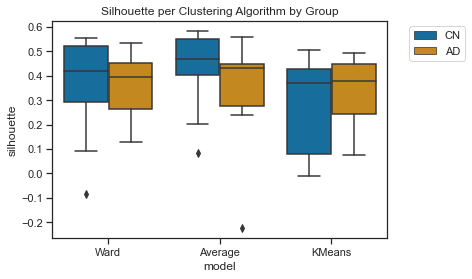

In [78]:
# create box plots comparing the silhouette scores for each clustering algorithm per group

sns.boxplot(x="model", y="silhouette",
            hue="group",
            data=sil_df).set_title('Silhouette per Clustering Algorithm by Group')

plt.legend(bbox_to_anchor=(1.05, 1))
plt.savefig("silhouette_box_plots_group.png", bbox_inches="tight", dpi=300)  # save the plot

In [81]:
# now make some lists to build a plot showing the mean and sd of silhouette scores for each clustering technique

algorithms = ['Ward', 'Average', 'KMeans']
x_pos = np.arange(len(algorithms))
means = [sil_ward_mean, sil_av_mean, sil_K_mean]
error = [sil_ward_sd, sil_av_sd, sil_K_sd]

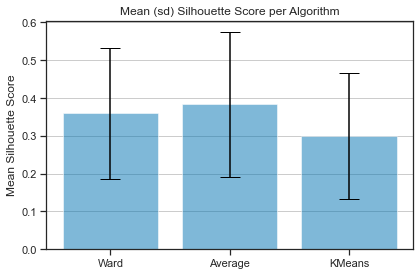

In [83]:
# build the plot
fig, ax = plt.subplots()
ax.bar(x_pos, means, yerr=error, align='center', alpha=0.5, ecolor='black', capsize=10)
ax.set_ylabel('Mean Silhouette Score')
ax.set_xticks(x_pos)
ax.set_xticklabels(algorithms)
ax.set_title('Mean (sd) Silhouette Score per Algorithm')
ax.yaxis.grid(True)

plt.tight_layout()
plt.savefig('bar_plot_with_error_bars.png', bbox_inches="tight", dpi=300)  # save the plot
plt.show()

In [86]:
# get the cognitive scores (MMSE) for subjects in either cluster 0 or cluster 1
# you can do this with any column in the df, e.g. age to see if something funny is going on

MMSE_ward0, MMSE_ward1 = cluster_values(df['MMSE Total Score'], df['ward_agglo'])
MMSE_av0, MMSE_av1 = cluster_values(df['MMSE Total Score'], df['average_agglo'])
MMSE_kmeans0, MMSE_kmeans1 = cluster_values(df['MMSE Total Score'], df['KMeans'])

In [88]:
# find the mean MMSE score for each cluster using different algorithms

print ('Using Agglomerative (Ward), mean MMSE for cluster 0=',np.mean(MMSE_ward0),'mean MMSE for cluster 1=',np.mean(MMSE_ward1))
print ('Using Agglomerative (Average), mean MMSE for cluster 0=',np.mean(MMSE_av0),'mean MMSE for cluster 1=',np.mean(MMSE_av1))
print ('Using KMeans, mean MMSE for cluster 0=',np.mean(MMSE_kmeans0),'mean MMSE for cluster 1=',np.mean(MMSE_kmeans1))

Using Agglomerative (Ward), mean MMSE for cluster 0= 24.625 mean MMSE for cluster 1= 22.5
Using Agglomerative (Average), mean MMSE for cluster 0= 24.11764705882353 mean MMSE for cluster 1= 24.666666666666668
Using KMeans, mean MMSE for cluster 0= 24.90909090909091 mean MMSE for cluster 1= 23.333333333333332


In [89]:
# now we can play around with whatever information we like, for example...
# get the seed to ROI correlations for one ROI, per each cluster

Langular_ward0, Langular_ward1 = cluster_values(df['L_angular'], df['ward_agglo'])
Langular_av0, Langular_av1 = cluster_values(df['L_angular'], df['average_agglo'])
Langular_kmeans0, Langular_kmeans1 = cluster_values(df['L_angular'], df['KMeans'])

Pearson's R for all participants (p value)= (0.19168853009887488, 0.41816542999242384)


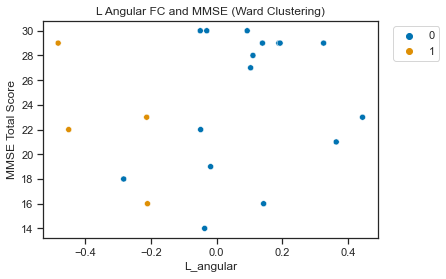

In [93]:
# plot a scatter plot showing ROI correlation values and MMSE score. Set the 'hue' to a clustering technique
# to show which data points are either in cluster 0 or 1, using that algorithm. You could also change hue to 
# show whether data points are a control or AD individual, for example. Or correlate ROI correlations with age

sns.scatterplot(data=df, x="L_angular", y="MMSE Total Score", 
                hue="ward_agglo").set_title("L Angular FC and MMSE (Ward Clustering)")

plt.legend(bbox_to_anchor=(1.2, 1))

# calculate the correlation between seed-ROI correlation values and cognition, and p value
corr = stats.pearsonr(df['L_angular'], df['MMSE Total Score']) 
print ("Pearson's R for all participants (p value)=",corr)
plt.savefig('L_angular_MMSE_scatter.png', bbox_inches="tight", dpi=300)  # save the plot

Pearson's R (p value) for all participants = (-0.13433858007114557, 0.5723007018980796)


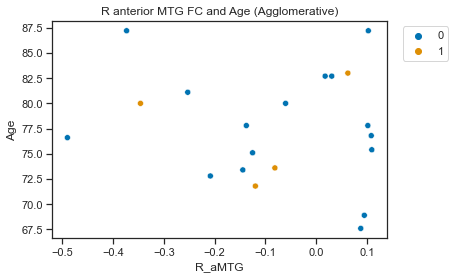

In [98]:
# a plot showing a different ROI and age

sns.scatterplot(data=df, x="R_aMTG", y="Age", 
                hue="ward_agglo").set_title("R anterior MTG FC and Age (Agglomerative)")

plt.legend(bbox_to_anchor=(1.2, 1))
corr = stats.pearsonr(df['R_aMTG'], df['Age'])
print ("Pearson's R (p value) for all participants =",corr)
plt.savefig('R_aMTG_age_scatter.png', bbox_inches="tight", dpi=300)  # save the plot